In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests as rq
import random as rnd
import json
import time

# Import API key
import config

# Import citypy to gather city locations
from citipy import citipy

In [2]:
city_list = []
weather_api = config.weather_api
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api

city_columns = ['City','City Latitude','City Longitude','Max Temperature','Humidity','Cloud Coverage','Wind Speed','City Country','City DateTime']
cnt = 1
weather_data_df = pd.DataFrame()

In [3]:
for x in range(1500):
    lat_value = round(rnd.uniform(-90, 90),2)
    long_value = round(rnd.uniform(-180, 180),2)
    city = citipy.nearest_city(lat_value,long_value)
    if city.city_name not in city_list:
        city_list.append(city.city_name)

In [4]:
print("Beginning Data Retrieval")
print("-------------------------------")
for city in city_list:
    try:
        response = rq.get(f'{url}&q={city}').json()
        city_date = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(response["dt"]))
        data = response['name'],response['coord']['lat'],response['coord']['lon'],response["main"]["temp_max"],response["main"]["humidity"],response["clouds"]["all"],response["wind"]["speed"],response["sys"]["country"],city_date
        weather_data_df = weather_data_df.append([data],ignore_index = True)
        print(f'Processing Record {cnt} for {city} city')
        cnt += 1

        time.sleep(2)
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 for torbay city
Processing Record 2 for hermanus city
Processing Record 3 for yellowknife city
City not found. Skipping...
Processing Record 4 for cape town city
Processing Record 5 for grindavik city
Processing Record 6 for kruisfontein city
Processing Record 7 for meulaboh city
Processing Record 8 for miram shah city
Processing Record 9 for khandyga city
Processing Record 10 for avarua city
Processing Record 11 for vestmannaeyjar city
Processing Record 12 for puerto ayora city
Processing Record 13 for new norfolk city
City not found. Skipping...
Processing Record 14 for saskylakh city
Processing Record 15 for lucea city
Processing Record 16 for kapaa city
Processing Record 17 for tuatapere city
Processing Record 18 for rikitea city
Processing Record 19 for zanjan city
Processing Record 20 for lae city
Processing Record 21 for arraial do cabo city
City not found. Skipping...
City not found. Skipping...
City n

In [5]:
#new_df = pd.DataFrame([data],columns=city_columns)
weather_data_df.columns = city_columns
weather_data_df

,City,City Latitude,City Longitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Country,City DateTime
0,Torbay,47.67,-52.73,44.01,74,75,16.11,CA,2020-11-13 10:41:31
1,Hermanus,-34.42,19.23,66.00,79,91,5.01,ZA,2020-11-13 10:40:52
2,Yellowknife,62.46,-114.35,8.60,92,75,8.05,CA,2020-11-13 10:42:21
3,Cape Town,-33.93,18.42,75.00,68,0,17.22,ZA,2020-11-13 10:41:38
4,Grindavik,63.84,-22.43,37.40,86,75,17.22,IS,2020-11-13 10:41:49
...,...,...,...,...,...,...,...,...,...
536,Coyhaique,-45.58,-72.07,53.60,71,75,5.82,CL,2020-11-13 11:02:12
537,Lingao,19.91,109.69,72.63,68,81,14.97,CN,2020-11-13 11:02:14
538,Chiredzi,-21.05,31.67,78.64,32,40,6.35,ZW,2020-11-13 11:02:16
539,San Jose,37.34,-121.89,52.00,69,86,5.06,US,2020-11-13 11:00:39


In [6]:
weather_data_df.describe()

,City Latitude,City Longitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,18.870185,15.612588,58.006525,72.548983,49.855823,7.818373
std,34.082985,91.637838,24.863060,19.875909,38.405217,5.616732
min,-54.800000,-179.170000,-20.200000,1.000000,0.000000,0.180000
25%,-10.410000,-62.060000,43.000000,64.000000,5.000000,3.740000
50%,21.640000,18.730000,64.380000,77.000000,52.000000,6.150000
75%,47.500000,95.320000,77.740000,87.000000,90.000000,10.290000
max,78.220000,179.320000,101.520000,100.000000,100.000000,34.450000


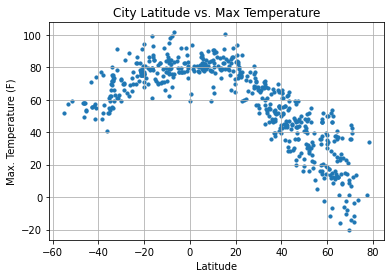

In [8]:
# Create scatter plot
plt.scatter(weather_data_df["City Latitude"], weather_data_df["Max Temperature"], marker="o", s=10)

# Set graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

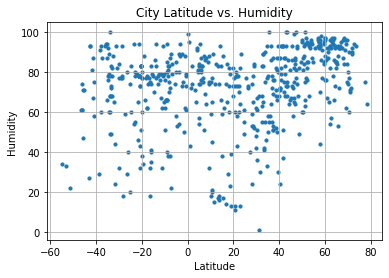

In [9]:
# Create scatter plot
plt.scatter(weather_data_df["City Latitude"], weather_data_df["Humidity"], marker="o", s=10)

# Set graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

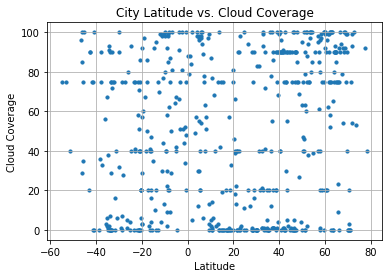

In [10]:
# Create scatter plot
plt.scatter(weather_data_df["City Latitude"], weather_data_df["Cloud Coverage"], marker="o", s=10)

# Set graph properties
plt.title("City Latitude vs. Cloud Coverage")
plt.ylabel("Cloud Coverage")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

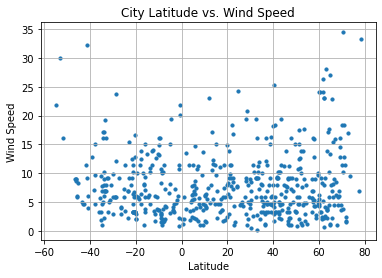

In [11]:
# Create scatter plot
plt.scatter(weather_data_df["City Latitude"], weather_data_df["Wind Speed"], marker="o", s=10)

# Set graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

In [13]:
#Create a series for both North and South Hemisphere
northern = weather_data_df.loc[weather_data_df['City Latitude'] >= 0]
southern = weather_data_df.loc[weather_data_df['City Latitude'] < 0]

In [31]:
#Store Latitude vales for both hemispheres
north_x_value = northern['City Latitude']
south_x_value = southern['City Latitude'] 

The r-squared is: 0.7755685685877178
The r-squared is: 0.47950484299884677


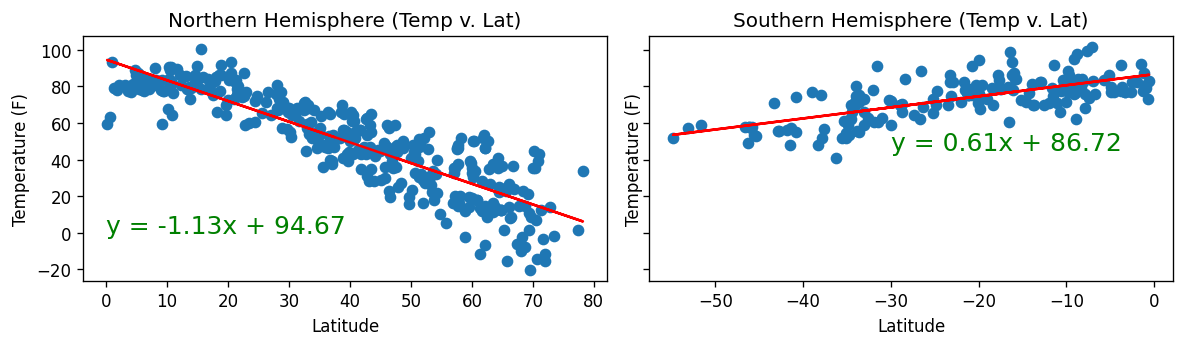

In [101]:
#Set dimensions & titles for side-by-side plots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,3), sharey=True, dpi=120)
ax1.set_title('Northern Hemisphere (Temp v. Lat)'); ax2.set_title('Southern Hemisphere (Temp v. Lat)')

#Plot Northern Hemisphere Scatter w/ annotation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_x_value,northern['Max Temperature'])
regress_values = north_x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax1.scatter(north_x_value,northern['Max Temperature'])
ax1.plot(north_x_value,regress_values,"r-")
ax1.annotate(line_eq,(0,0),fontsize=15,color="green")
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Temperature (F)")
print(f"The r-squared is: {rvalue**2}")

#Plot SouthernHemisphere Scatter w/ annotation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_x_value,southern['Max Temperature'])
regress_values = south_x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax2.scatter(south_x_value,southern['Max Temperature'])
ax2.plot(south_x_value,regress_values,"r-")
ax2.annotate(line_eq,(-30,45),fontsize=15,color="green")
ax2.set_xlabel("Latitude")
ax2.set_ylabel("Temperature (F)")
print(f"The r-squared is: {rvalue**2}")

#Show plot
plt.tight_layout()
plt.show()

The r-squared is: 0.15313737033460148


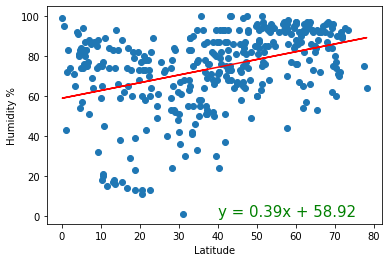

In [36]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_x_value,northern['Humidity'])
regress_values = north_x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_x_value,northern['Humidity'])
plt.plot(north_x_value,regress_values,"r-")
plt.annotate(line_eq,(40,0),fontsize=15,color="green")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.010023238785402972


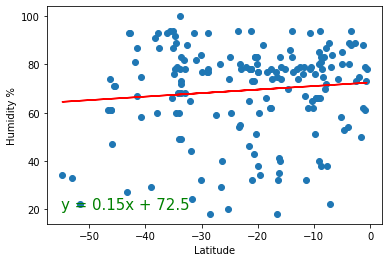

In [45]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_x_value,southern['Humidity'])
regress_values = south_x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_x_value,southern['Humidity'])
plt.plot(south_x_value,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="green")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [240]:
#%reset